<a href="https://colab.research.google.com/github/jorgenriquez/Inteligencia_artificial/blob/main/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Lineal Simple**

La Regresión Lineal Simple es un modelo matemático que describe la relación entre una variable dependiente $Y$ y una variable independiente $X$ utilizando una línea recta. Se basa en el supuesto de que existe una relación lineal entre ambas variables y busca encontrar la mejor línea de ajuste que minimiza el error.

## **Ecuación de regresión lineal simple**
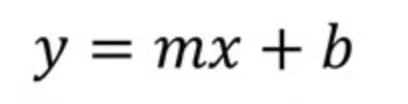

Aquí

$m$ es la pendiente de la recta
*$b$* es el intercepto


En el contexto de la ciencia de datos, es más probable esta ecuación en su lugar:

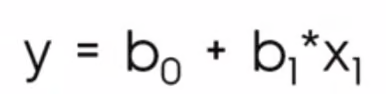


Dónde

$b0$ es la intersección y
$b1$ es la pendiente

En un modelo de regresión lineal simple tratamos de explicar la relación que existe entre la variable respuesta ***Y*** y una única variable explicativa ***X***.   

Mediante las técnicas de regresión de una variable **Y** sobre una variable **X**, buscamos una función que sea una buena aproximación de una nube de puntos (xi,yi), mediante una curva del tipo:

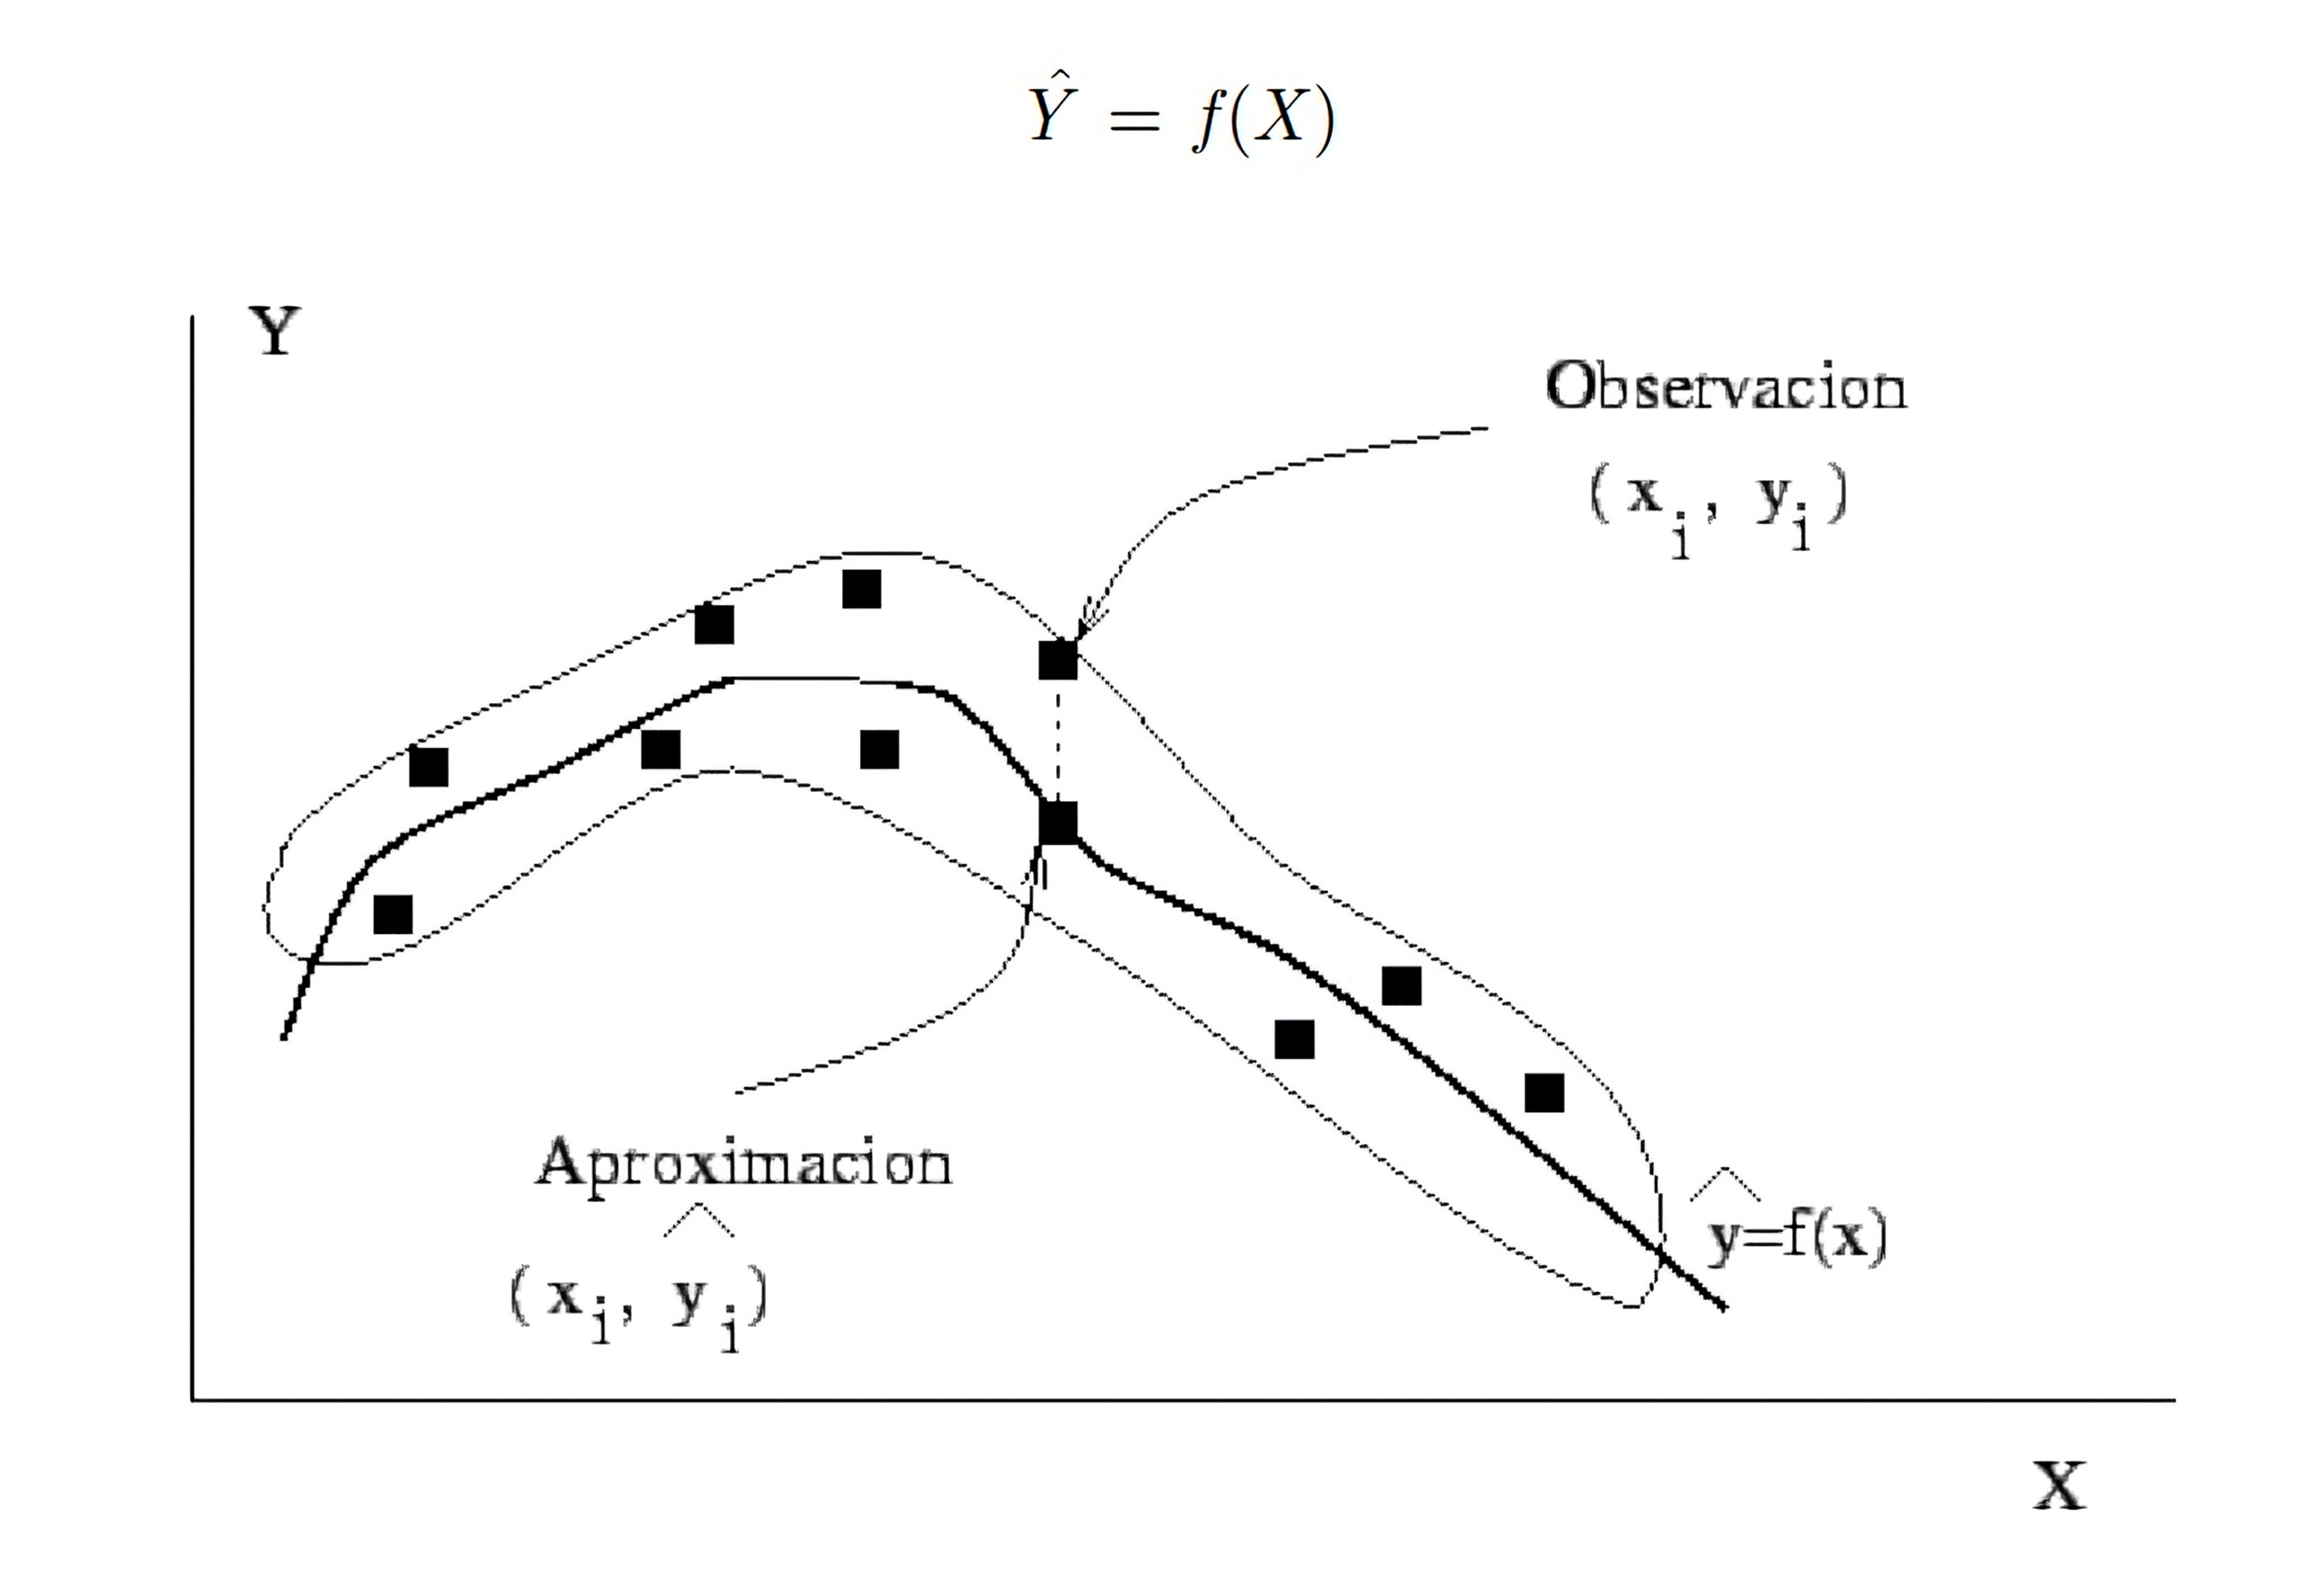


En el Contexto del Machine Learning, el modelo de regresión lineal simple tiene la siguiente expresión:

$Y=\alpha+\beta X+\varepsilon$


En donde $\alpha$ es la ordenada en el origen (el valor que toma Y cuando X vale 0), $\beta$ es la pendiente de la recta (e indica cómo cambia Y al incrementar X en una unidad) y $\varepsilon$ una variable que incluye un conjunto grande de factores, cada uno de los cuales influye en la respuesta sólo en pequeña magnitud, a la que llamaremos error. X e Y son variables aleatorias, por lo que no se puede establecer una relación lineal exacta entre ellas.

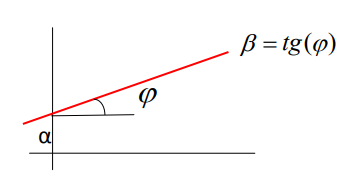


Para hacer una estimación del modelo de regresión lineal simple, trataremos de buscar una recta de la forma:

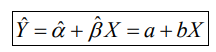

de modo que se ajuste a la nube de puntos.

Para esto utilizaremos el método de mínimos cuadrados. Este método consiste en minimizarla suma de los cuadrados de los errores:

$$
\sum_{i=1}^n e_i^2=\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2
$$

Es decir, la suma de los cuadrados de las diferencias entre los valores reales observados $(yi)$ y los valores estimados $\hat{y}_i$.


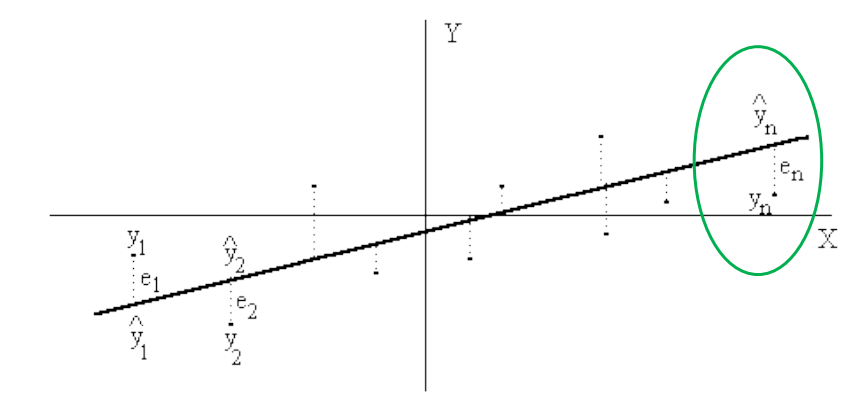

Con este método, las expresiones que se obtiene para a y b son las siguientes:

$$
a=\bar{y}-b \bar{x}, \quad b=\frac{S_{X Y}}{S_X^2}
$$

En donde $\bar{x}$ e $\bar{y}$ denotan las medias muestrales de $X$ e $Y$ (respectivamente), $S_X^2$ es la varianza muestral de $X$ y $S_{X Y}$ es la covarianza muestral entre $X$ e $Y$.

Estos parámetros se calculan como:

$$
\bar{x}=\frac{\sum_{i=1}^n x_i}{n}, \quad \bar{y}=\frac{\sum_{i=1}^n y_i}{n}, \quad S_X^2=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}{n}, \quad S_Y^2=\frac{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2}{n}, \quad S_{X Y}=\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{n} .
$$

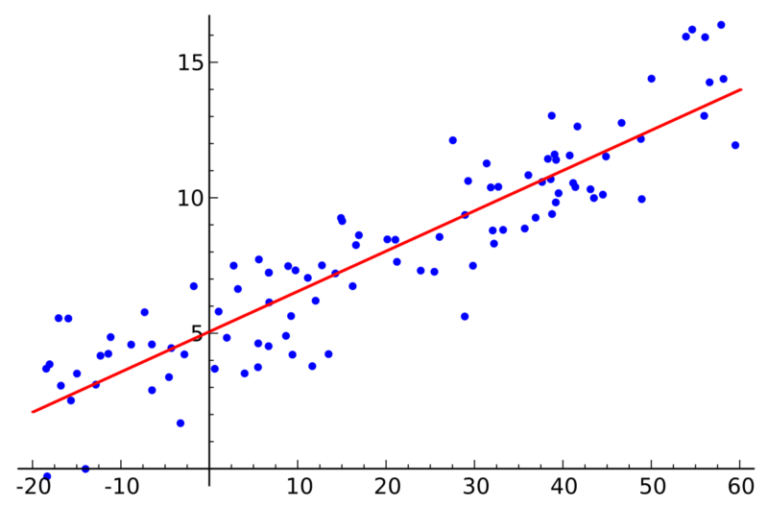

# Regresión Lineal Simple

## Importar las librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importar los datasets

In [ ]:
dataset = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
dataset.info  # Dataframe

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [ ]:
dataset.head(8)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0


## Dividimos el Dataset en las variables X e y

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Dividir el dataset entre conjuntos de entrenamiento y testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
type(X_train)

numpy.ndarray

## Entrenar el modelo de Regresión Lineal Simple usando el conjunto de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # Entreno el modelo

LinearRegression()

## Predecir los resultados de test

In [ ]:
y_pred = regressor.predict(X_test)

## Visualizar los resultados en el conjunto de entrenamiento

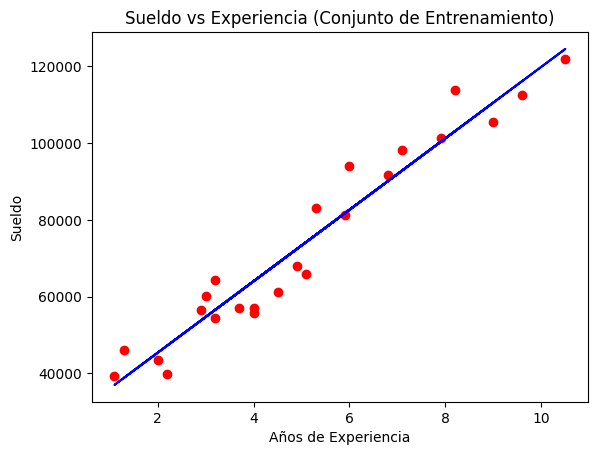

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sueldo vs Experiencia (Conjunto de Entrenamiento)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo')
plt.show()

## Visualizar los resultados en el conjunto de testing

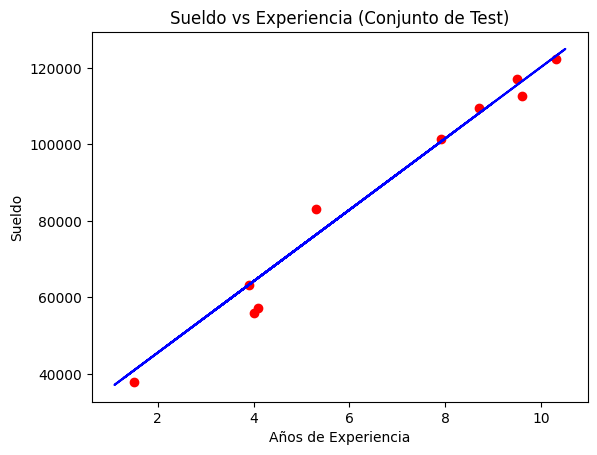

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sueldo vs Experiencia (Conjunto de Test)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo')
plt.show()